# Data description

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.


## starting by importing our libraries

In [1]:
import pandas as pd #For DataFrames
import numpy as np #Mathmatical Operations
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
plt.style.use('seaborn')
sns.set()

In [2]:
df=pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### **Columns meaning**
* Species : name of the fishs 
* Weight : weight of fish in gm 
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.isnull().sum()
 

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [8]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

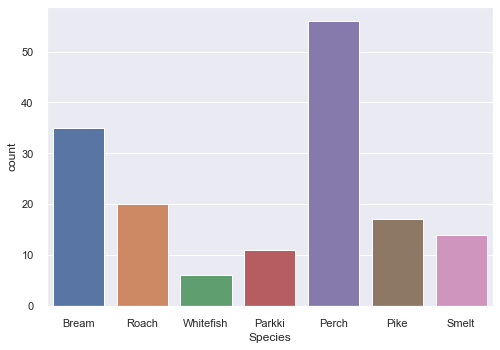

In [9]:
sns.countplot(df['Species'])
# we could see that the most frequent Species in our dataset is Perch and the least one is Whitefish

In [10]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


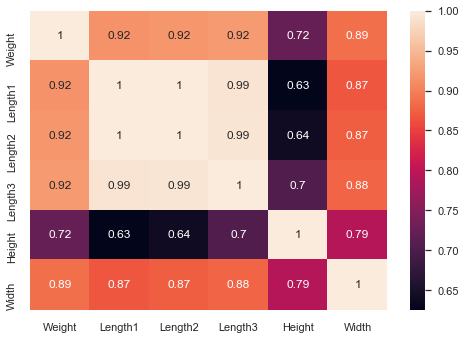

In [11]:
sns.heatmap(df.corr(), annot=True)
# We can see that lenght 1,2,3 is highly corrlated with weight
# and hight is highly negitive corrlated with weight

In [12]:
# encoding the Species Coulum(our target) cause we need all the data we going to feed to our model to be numeric
df['Species'] = df['Species'].map({'Bream' : 1 , 'Roach':2 , 'Whitefish':3 , 'Parkki Species':4 , 'Perch':5 , 'Pike':6,'Smelt':7})

In [13]:
print (df['Species'])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
154    7.0
155    7.0
156    7.0
157    7.0
158    7.0
Name: Species, Length: 159, dtype: float64


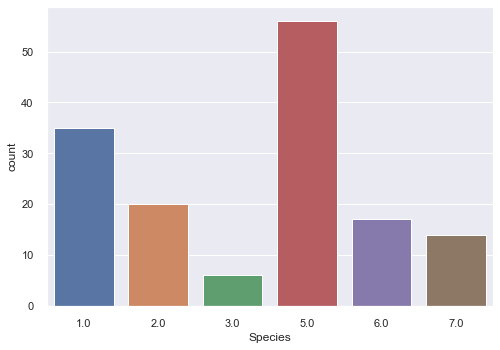

In [14]:
sns.countplot(df['Species'])

more visulation with boxplot to figure out if there an outliers 

In [15]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

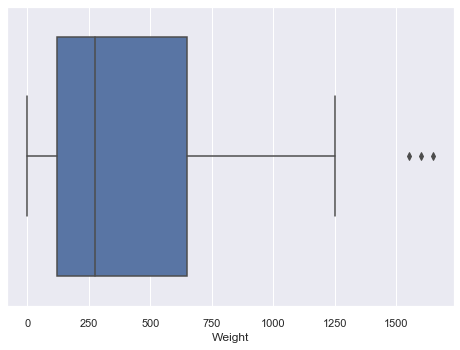

In [16]:
sns.boxplot(x=df['Weight']);

In [17]:
## we need to remove these 3 outliers points
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [18]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers
# we will remove them later 

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

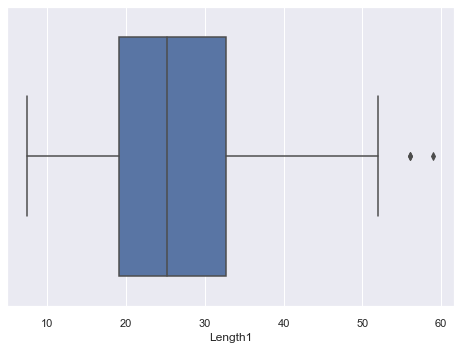

In [19]:
sns.boxplot(df['Length1']);

In [20]:
## 2 outliers points lets figure out which points
dfl1 = df['Length1']
dfl1_Q1 = dfl1.quantile(0.25)
dfl1_Q3 = dfl1.quantile(0.75)
dfl1_IQR = dfl1_Q3 - dfl1_Q1
dfl1_lowerend = dfl1_Q1 - (1.5 * dfl1_IQR)
dfl1_upperend = dfl1_Q3 + (1.5 * dfl1_IQR)
dfl1_outliers = dfl1[(dfl1 < dfl1_lowerend) | (dfl1 > dfl1_upperend)]
dfl1_outliers
# same data point as above

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

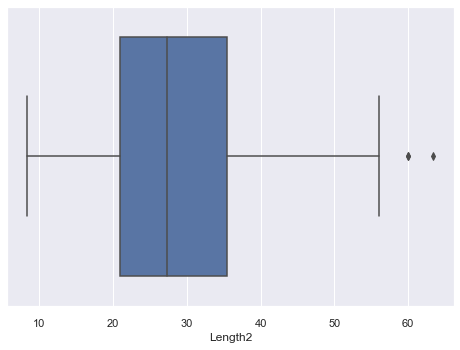

In [21]:
sns.boxplot(df['Length2']);

In [22]:
dfl2 = df['Length2']
dfl2_Q1 = dfl2.quantile(0.25)
dfl2_Q3 = dfl2.quantile(0.75)
dfl2_IQR = dfl2_Q3 - dfl2_Q1
dfl2_lowerend = dfl2_Q1 - (1.5 * dfl2_IQR)
dfl2_upperend = dfl2_Q3 + (1.5 * dfl2_IQR)
dfl2_outliers = dfl2[(dfl2 < dfl2_lowerend) | (dfl2 > dfl2_upperend)]
dfl2_outliers
# same data points 

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

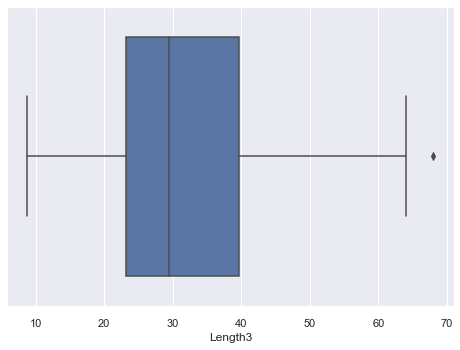

In [23]:
sns.boxplot(df['Length3']);

In [24]:
dfl3 = df['Length3']
dfl3_Q1 = dfl3.quantile(0.25)
dfl3_Q3 = dfl3.quantile(0.75)
dfl3_IQR = dfl3_Q3 - dfl3_Q1
dfl3_lowerend = dfl3_Q1 - (1.5 * dfl3_IQR)
dfl3_upperend = dfl3_Q3 + (1.5 * dfl3_IQR)
dfl3_outliers = dfl3[(dfl3 < dfl3_lowerend) | (dfl3 > dfl3_upperend)]
dfl3_outliers

144    68.0
Name: Length3, dtype: float64

lets remove the Outliers


In [25]:
df[142:145]# 145 exulisive

,Species,Weight,Length1,Length2,Length3,Height,Width
142,6.0,1600.0,56.0,60.0,64.0,9.600,6.144
143,6.0,1550.0,56.0,60.0,64.0,9.600,6.144
144,6.0,1650.0,59.0,63.4,68.0,10.812,7.480


In [26]:
df = df.drop([142,143,144])
# remove them 

In [27]:
## machine learing model 

In [28]:
df = df.dropna() 
x = df[['Length1' , 'Length2' ,'Length3' ,'Weight','Width' ]] # our feature
y = df['Species'] # our target


### Train and test data

In [ ]:
#lets split our data into train and test sets by using the train_test_split modul
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### build a Linear Regression model

In [31]:
from sklearn.linear_model import  LinearRegression

# creating a model
reg = LinearRegression()

# feeding the training data to the model
reg.fit(x_train, y_train)

# predicting the test set results
y_pred = reg.predict(x_test)



Training Accuracy : 0.8475587483214505
Testing Accuracy : 0.8507675168224863


### Evaluate our model

In [ ]:
# calculating the classification accuracies
print("Training Accuracy :", reg.score(x_train, y_train))
print("Testing Accuracy :", reg.score(x_test, y_test))

# Done